In [1]:
import numpy as np
import torch
import torch.optim as optim

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = t_u * 0.1

In [2]:
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b

def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()

def training_loop(epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, epochs + 1):
        loss = loss_fn(model(t_u, *params), t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print("(w1, w2, b) = ({}, {}, {}); Loss = {}".format(*params, loss))
    return params

In [3]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
params = training_loop(5000, optim.SGD([params], lr = 1e-5), params, t_un, t_c)
print(params)

(w1, w2, b) = (0.8468338251113892, 0.26407569646835327, -0.03543534874916077); Loss = 13.269524574279785
(w1, w2, b) = (0.8103449940681458, 0.2701892554759979, -0.05147922411561012); Loss = 12.944253921508789
(w1, w2, b) = (0.7744817137718201, 0.2762041985988617, -0.06727403402328491); Loss = 12.629864692687988
(w1, w2, b) = (0.7392325401306152, 0.2821168601512909, -0.08282412588596344); Loss = 12.325987815856934
(w1, w2, b) = (0.7045872807502747, 0.2879287302494049, -0.0981336310505867); Loss = 12.032271385192871
(w1, w2, b) = (0.6705358028411865, 0.2936416566371918, -0.11320658773183823); Loss = 11.74837875366211
(w1, w2, b) = (0.6370677351951599, 0.2992575466632843, -0.12804703414440155); Loss = 11.473977088928223
(w1, w2, b) = (0.6041734218597412, 0.30477768182754517, -0.14265882968902588); Loss = 11.208751678466797
(w1, w2, b) = (0.571843147277832, 0.31020376086235046, -0.1570458561182022); Loss = 10.952396392822266
(w1, w2, b) = (0.5400674939155579, 0.31553754210472107, -0.171211

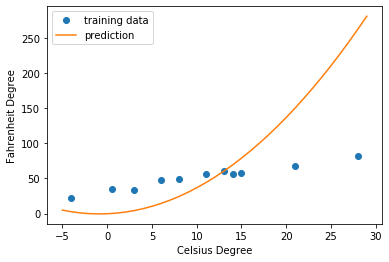

In [4]:
from matplotlib import pyplot as plt

sample_t_c = torch.tensor(range(-5, 30))
sample_t_p = model(sample_t_c, *params)
plt.plot(t_c.numpy(), t_u.numpy(), 'o', label = "training data")
plt.plot(sample_t_c.numpy(), sample_t_p.detach().numpy(), label = "prediction")
plt.xlabel("Celsius Degree")
plt.ylabel("Fahrenheit Degree")
plt.legend()